### Goal: How does 'features' of song affect its 'popularity' (Ranking or Streams) on 'Various Platforms'

### 1. Importing and Information of Data

In [34]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() 

# Used for regex(duplicates cleaning)
import re

Description of the dataset, as available on Kaggle, is as follows.
Learn more : 

In [2]:
# Reading Dataset
spot_Og = pd.read_csv('C:\\Users\\gohse\\Downloads\\Telegram Desktop\\new-spotify-2023.csv',header = 1)

In [3]:
# Check some rows
spot_Og.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [4]:
# Overall info of Dataset
#2 variables with missing values: "in_shazam_charts" and "key"

spot_Og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [5]:
# Variable Description

Description of the dataset, as available on Kaggle, is as follows.
Source : https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023

- **track_name**: Name of the song
- **artist(s)_name**: Name of the artist(s) of the song 
- **artist_count**: Number of artists contributing to the song
- **released_year**: Year when the song was released 
- **released_month**: Month when the song was released  
- **released_day**: Day of the month when the song was released
- **in_spotify_playlists**: Number of Spotify playlists the song is included in 
- **in_spotify_charts**: Presence and rank of the song on Spotify charts
- **streams**: Total number of streams on Spotify
- **in_apple_playlists**: Number of Apple Music playlists the song is included in
- **in_apple_charts**: Presence and rank of the song on Apple Music charts
- **in_deezer_playlists**: Number of Deezer playlists the song is included in
- **in_deezer_charts**: Presence and rank of the song on Deezer charts
- **in_shazam_charts**: Presence and rank of the song on Shazam charts
- **bpm**: Beats per minute, a measure of song tempo
- **key**: Key of the song
- **mode**: Mode of the song (major or minor)
- **danceability_%**: Percentage indicating how suitable the song is for dancing
- **valence_%**: Positivity of the song's musical content
- **energy_%**: Perceived energy level of the song
- **acousticness_%**: Amount of acoustic sound in the song
- **instrumentalness_%**: Amount of instrumental content in the song
- **liveness_%**: Presence of live performance elements
- **speechiness_%**: Amount of spoken words in the song

### 2. Data Cleaning

#### 2a) Tackling Duplicate Track Names

In [7]:
# Check if any tracks repeated(only check track name as other variables can be repeated, but track cannot)
print("Unique Names of Tracks :", len(spot_Og["track_name"].unique()))

# There are 953 total tracks, but 943 are unique...

Unique Names of Tracks : 943


In [14]:
# Dataframe for duplicated values
dupliTracks = spot_Og[spot_Og.duplicated("track_name", keep = False)]


In [19]:
print("dupliData dimensions : ", dupliTracks.shape)

# There are total 20 rows of duplicated, meaning 10 tracks with name appearing twice

dupliData dimensions :  (20, 24)


In [15]:
# Display Duplicated values
dupliTracks.sort_values(by = "track_name").head(n = 25)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
764,About Damn Time,Lizzo,1,2022,4,14,9021,0,723894473,242,...,109,A#,Minor,84,72,74,10,0,34,7
372,About Damn Time,Lizzo,1,2022,7,15,2332,2,723894473,0,...,109,A#,Minor,84,72,74,10,0,34,7
13,Daylight,David Kushner,1,2023,4,14,3528,98,387570742,80,...,130,D,Minor,51,32,43,83,0,9,3
831,Daylight,Harry Styles,1,2022,5,20,2775,0,290833204,21,...,146,NaN,Major,69,63,45,48,0,18,4
47,Die For You,The Weeknd,1,2016,11,24,2483,59,1647990401,68,...,134,C#,Minor,59,51,52,9,0,15,7
417,Die For You,Joji,1,2022,11,4,1703,0,246390068,38,...,148,G#,Major,47,15,52,38,13,29,5
12,Flowers,Miley Cyrus,1,2023,1,12,12211,115,1316855716,300,...,118,NaN,Major,71,65,68,6,0,3,7
825,Flowers,Lauren Spencer Smith,1,2021,8,9,801,0,184826429,42,...,138,D#,Major,70,31,44,84,0,9,39
466,Let It Snow! Let It Snow! Let It Snow!,"Frank Sinatra, B. Swanson Quartet",2,1950,1,1,10585,0,473248298,126,...,143,D,Major,60,86,32,88,0,34,6
448,Let It Snow! Let It Snow! Let It Snow!,Dean Martin,1,1959,11,16,6512,0,446390129,88,...,134,C#,Major,45,72,24,91,0,18,4


##### 2 reason for Duplicate
> 1) Some duplicates are covers by different singers (so they are unique).
     - Solution: Mark as version 1 / version etc, some way to indentify. 

> 2) EXACTLY the same song and singer but diff stream count,ranking,key and features somehow. 
     - Solution: Consider as version 1 and version 2. 

In [40]:
# BEGIN CLEANING

# 1. Create Dataset Copy to clean
# NOTE! - Re-running cell without running renaming cell will revert to original naming of variables
spot_v1 = spot_Og.copy()

In [41]:
# 2. Rename variable names (Optional)

# Rename 0.track_name 
#spot_v1.rename(columns = {'track_name': 'TRACK'}, inplace = True)

# Rename 1. artist(s)_name
#spot_v1.rename(columns = {'artist(s)_name': 'ARTISTS'}, inplace = True)



In [45]:
# 3) Renaming Duplicated Song names

# renaming 'About Damn Time	'(issue 2)
spot_v1.iloc[764,0] = 'About Damn Time(v1)'
spot_v1.iloc[372,0] = 'About Damn Time(v2)'

# renaming 'Daylight'(issue 1)
spot_v1.iloc[13,0] = 'Daylight(D.Kushner)'
spot_v1.iloc[831,0] = 'Daylight(H.Styles)'

# renaming 'Die for you'(issue 1)
spot_v1.iloc[47,0] = 'Die For You(T.Weeknd)'
spot_v1.iloc[417,0] = 'Die For You(Joji)'

# renaming 'Flowers'(issue 1)
spot_v1.iloc[12,0] = 'Flowers(M.Cyrus)'
spot_v1.iloc[825,0] = 'Flowers(L.S.Smith)'

# renaming 'LetItSnow!LetItSnow!LetItSnow!'(issue 1)
spot_v1.iloc[466,0] = 'Let It Snow! Let It Snow! Let It Snow!(F.Sinatra...)'
spot_v1.iloc[448,0] = 'Let It Snow! Let It Snow! Let It Snow!(D.Martin)'

# renaming 'Miss You'(issue 1 )
spot_v1.iloc[335,0] = 'Miss You(R.Schulz)'
spot_v1.iloc[922,0] = 'Miss You(Southstar)'

# renaming 'Numb'(issue 1 )
spot_v1.iloc[331,0] = 'Numb(L.Park)'
spot_v1.iloc[852,0] = 'Numb(Marshmello...)'

# renaming 'SNAP'(issue 2)
spot_v1.iloc[178,0] = 'SNAP(v1)'
spot_v1.iloc[873,0] = 'SNAP(v2)'

# renaming 'SPIT IN MY FACE!'(issue 2)
spot_v1.iloc[345,0] = 'SPIT IN MY FACE!(v1)'
spot_v1.iloc[482,0] = 'SPIT IN MY FACE!(v2)'

# renaming 'Take My Breath'(issue 2)
spot_v1.iloc[512,0] = 'Take My Breath(v1)'
spot_v1.iloc[616,0] = 'Take My Breath(v2)'

In [47]:
# Check if any tracks repeated after updated (should be 953 if success)
print("Unique Names of Tracks :", len(spot_v1["track_name"].unique()))

Unique Names of Tracks : 953


#### 2b) Tackling Missing Values

In [48]:
# Check missing values in data
spot_v1.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [56]:
# Currently now they are all NaN Values

In [ ]:
# TBC

### 3. Explorotary Data Analysis

#### 3a) Correlation between Features & Streams
> There are total 10 Features we look at...
- **bpm**: Beats per minute, a measure of song tempo
- **key**: Key of the song
- **mode**: Mode of the song (major or minor)
- **danceability_%**: Percentage indicating how suitable the song is for dancing
- **valence_%**: Positivity of the song's musical content
- **energy_%**: Perceived energy level of the song
- **acousticness_%**: Amount of acoustic sound in the song
- **instrumentalness_%**: Amount of instrumental content in the song
- **liveness_%**: Presence of live performance elements
- **speechiness_%**: Amount of spoken words in the song

---

**Caveats**
- "key" and "mode" are Strings and Catergorical -> Analyse seperately from other Features

##### Converting predicted "Result" - Streams , from String to Numeric

In [80]:
# Note Stream is  currently object - need to convert to int64
spot_v1["streams"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 953 entries, 0 to 952
Series name: streams
Non-Null Count  Dtype 
--------------  ----- 
953 non-null    object
dtypes: object(1)
memory usage: 7.6+ KB


In [81]:
# Function used to convert "stream"(string->numeric) using Regex
def checker(data):
    match = re.search(r'\d+', data)
    if match:
        return (int(match.group()))

In [82]:
spot_v1["streams"] = spot_v1["streams"].apply(checker)

In [84]:
# Now "streams" is of int64 type
spot_v1["streams"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 953 entries, 0 to 952
Series name: streams
Non-Null Count  Dtype
--------------  -----
953 non-null    int64
dtypes: int64(1)
memory usage: 7.6 KB


---

#### UNI-VARIATE Exploration

##### Exploring "stream"(the predicted)(UNI-VARIATE)

In [88]:
# Dataframe for "stream"
streamDF = pd.DataFrame(spot_v1["streams"])

In [90]:
streamDF.describe()

,streams
count,9.530000e+02
mean,5.135979e+08
std,5.668039e+08
min,1.100000e+02
25%,1.413817e+08
50%,2.902286e+08
75%,6.738011e+08
max,3.703895e+09


<Axes: >

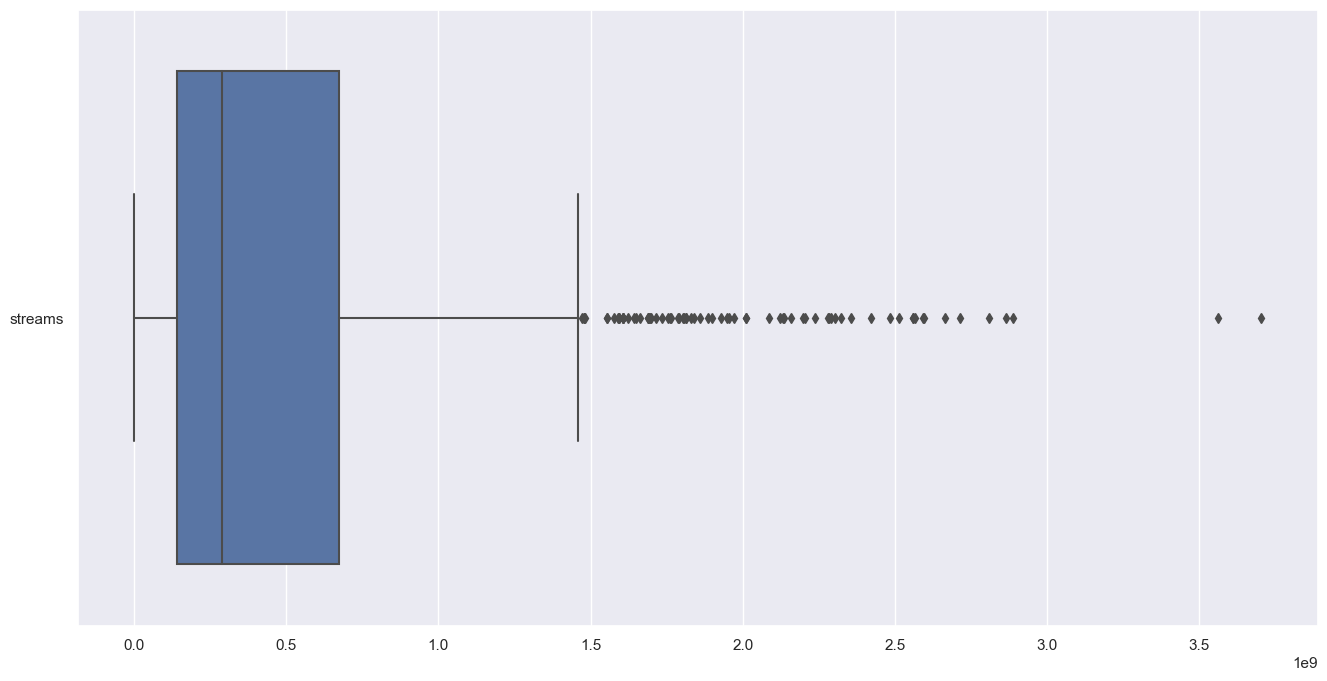

In [91]:
# BOXPLOT of "streams"
f = plt.figure(figsize=(16, 8))
sb.boxplot(data = streamDF, orient = "h")  

<Axes: ylabel='Count'>

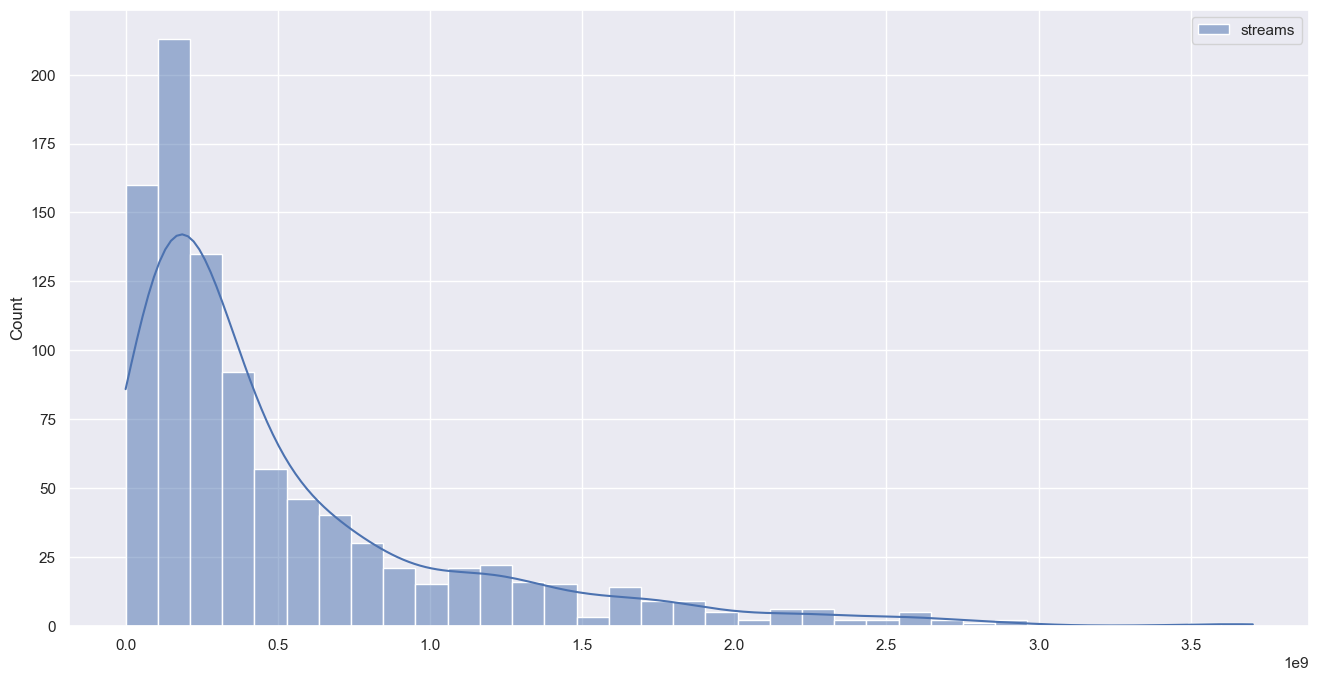

In [92]:
# KDE for 'streams' 
f = plt.figure(figsize=(16, 8))
sb.histplot(data = streamDF, kde = True)

<Axes: >

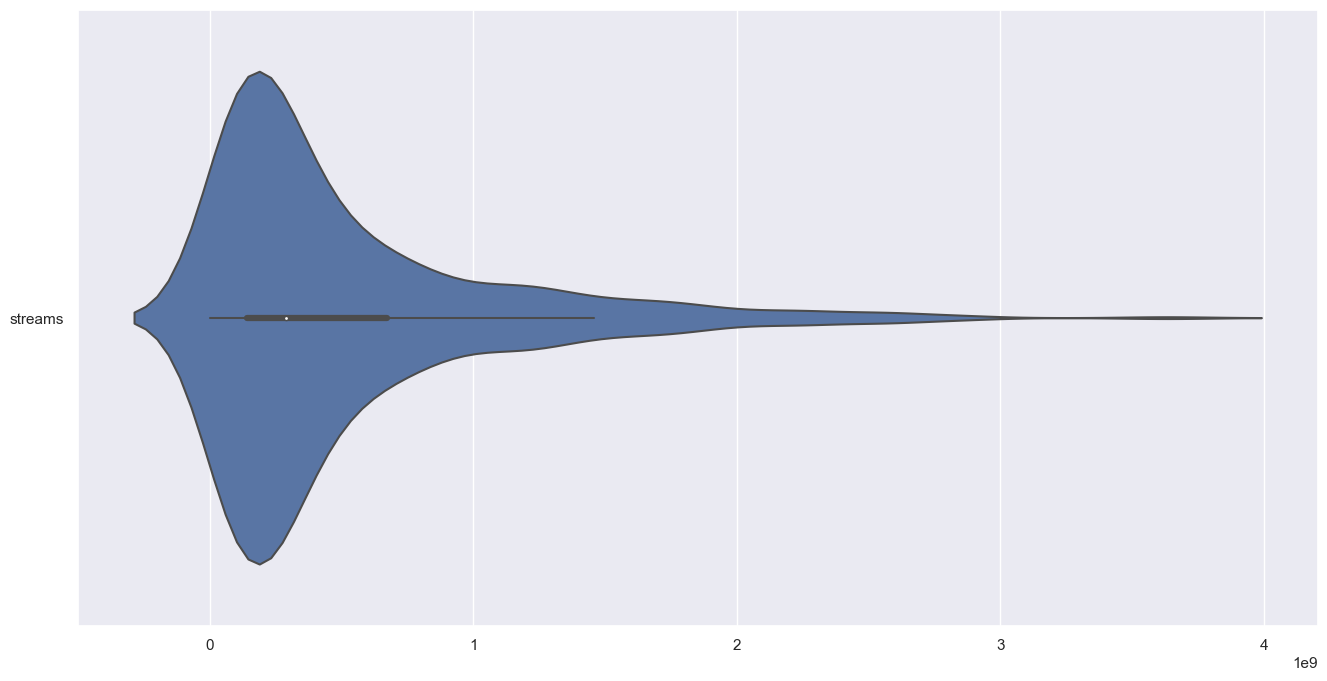

In [93]:
# VIOLIN PLOT for "streams"
f = plt.figure(figsize=(16, 8))
sb.violinplot(data = streamDF, orient = "h")

##### Exploring "in-spotify-charts" as another possible(Predicted result/measure for success)(UNI-VARIATE)

In [94]:
# Dataframe for "in_spotify_charts"
spotChartsDF = pd.DataFrame(spot_v1["in_spotify_charts"])

In [96]:
spotChartsDF.describe()

,in_spotify_charts
count,953.000000
mean,12.009444
std,19.575992
min,0.000000
25%,0.000000
50%,3.000000
75%,16.000000
max,147.000000


<Axes: >

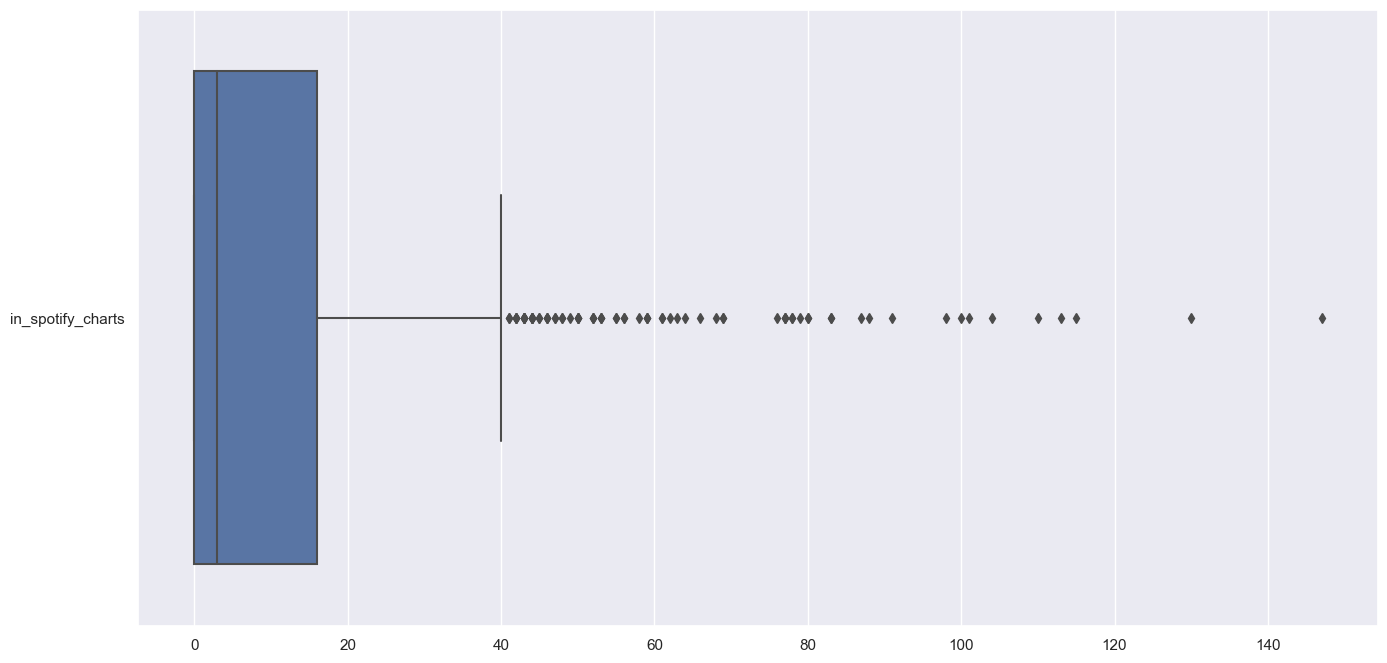

In [97]:
# BOXPLOT of "in_spotify_charts"
f = plt.figure(figsize=(16, 8))
sb.boxplot(data = spotChartsDF, orient = "h")  

<Axes: ylabel='Count'>

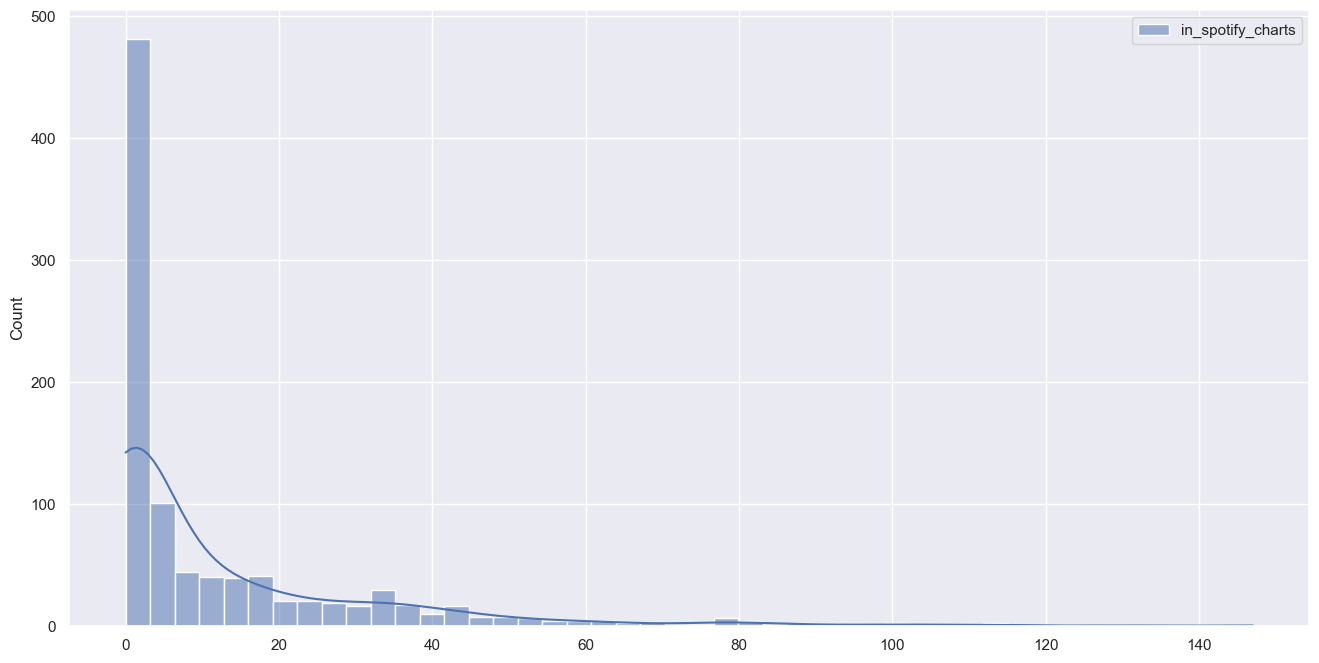

In [98]:
# KDE for 'in_spotify_charts' 
f = plt.figure(figsize=(16, 8))
sb.histplot(data = spotChartsDF, kde = True)

<Axes: >

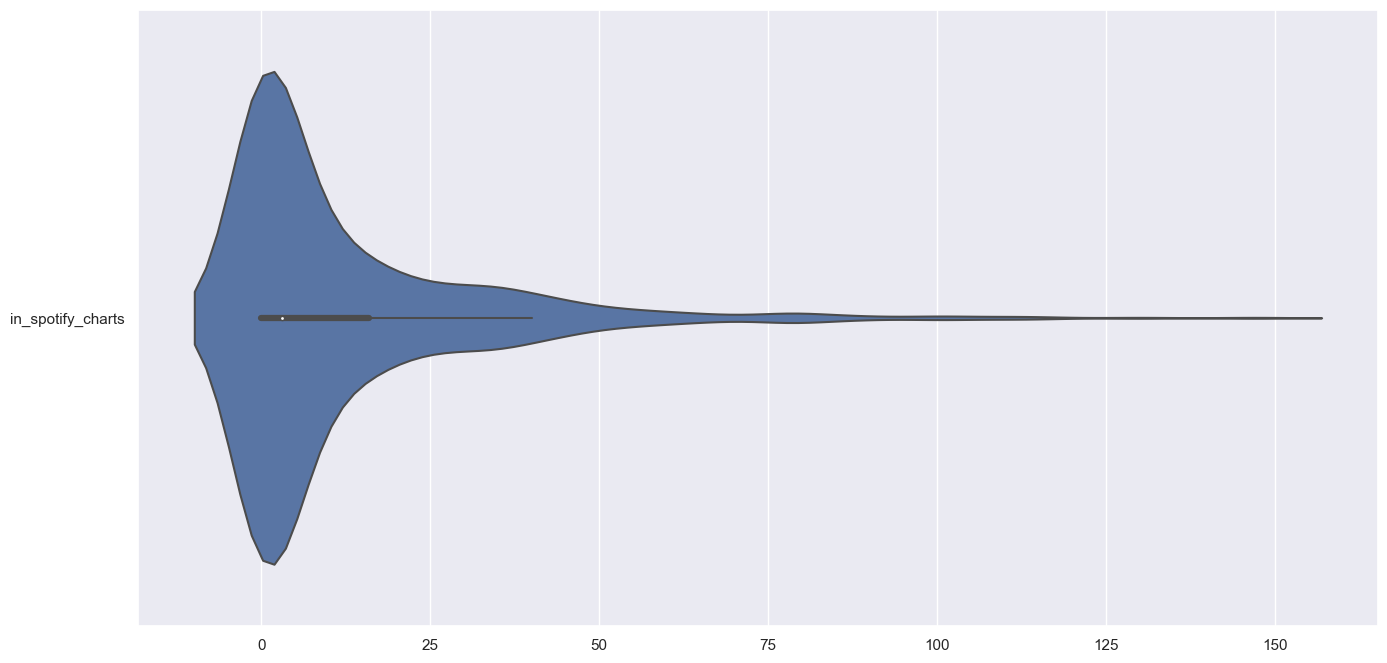

In [99]:
# VIOLIN PLOT for "in_spotify_charts"
f = plt.figure(figsize=(16, 8))
sb.violinplot(data = spotChartsDF, orient = "h")

In [ ]:
# NOTE most values are actualy given 0 rank, maybe not a good measure for succes of a song

##### Exploring the 8 numerical Features...

In [57]:
# Extract only the numeric data variables
numFeature = pd.DataFrame(spot_v1[["bpm", "danceability_%", "valence_%", "energy_%", "acousticness_%", "instrumentalness_%","liveness_%","speechiness_%"]])

# Summary Statistics for all Variables
numFeature.describe()

,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


<Axes: >

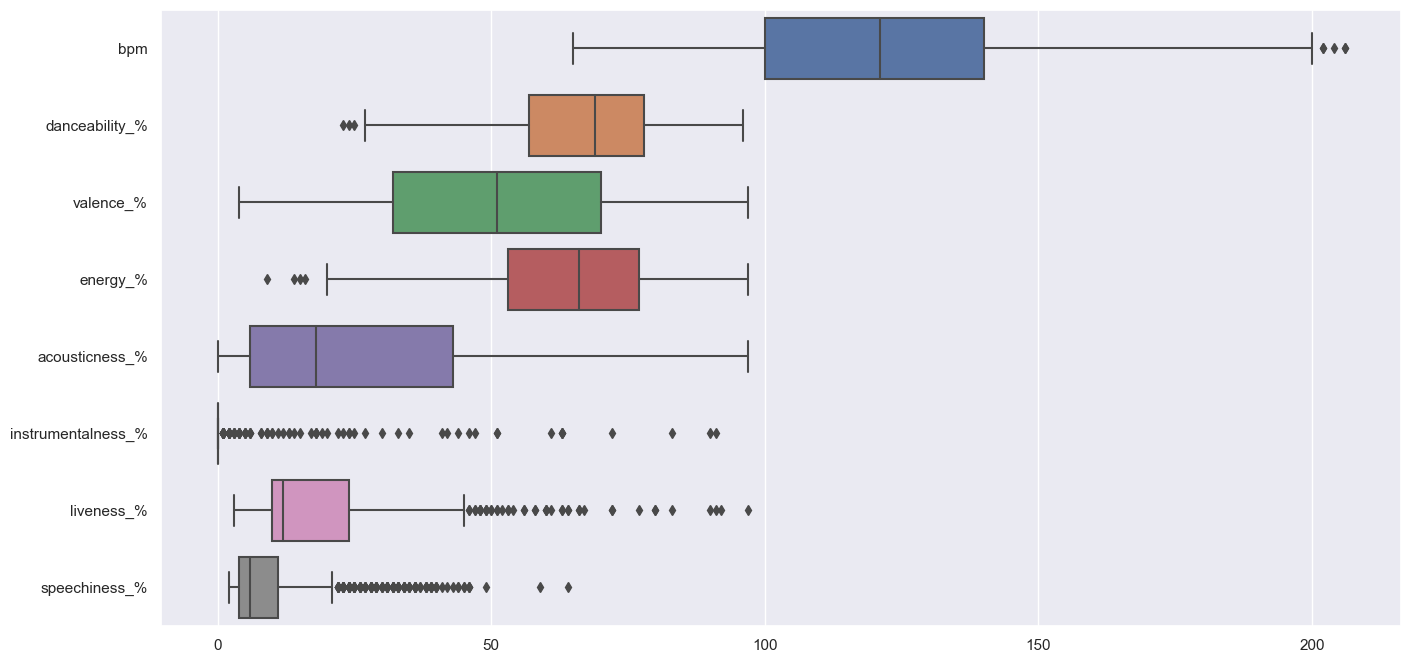

In [58]:
# BOXPLOT for 8 Features (UNI-VARIATE)

f = plt.figure(figsize=(16, 8))
sb.boxplot(data = numFeature, orient = "h")  

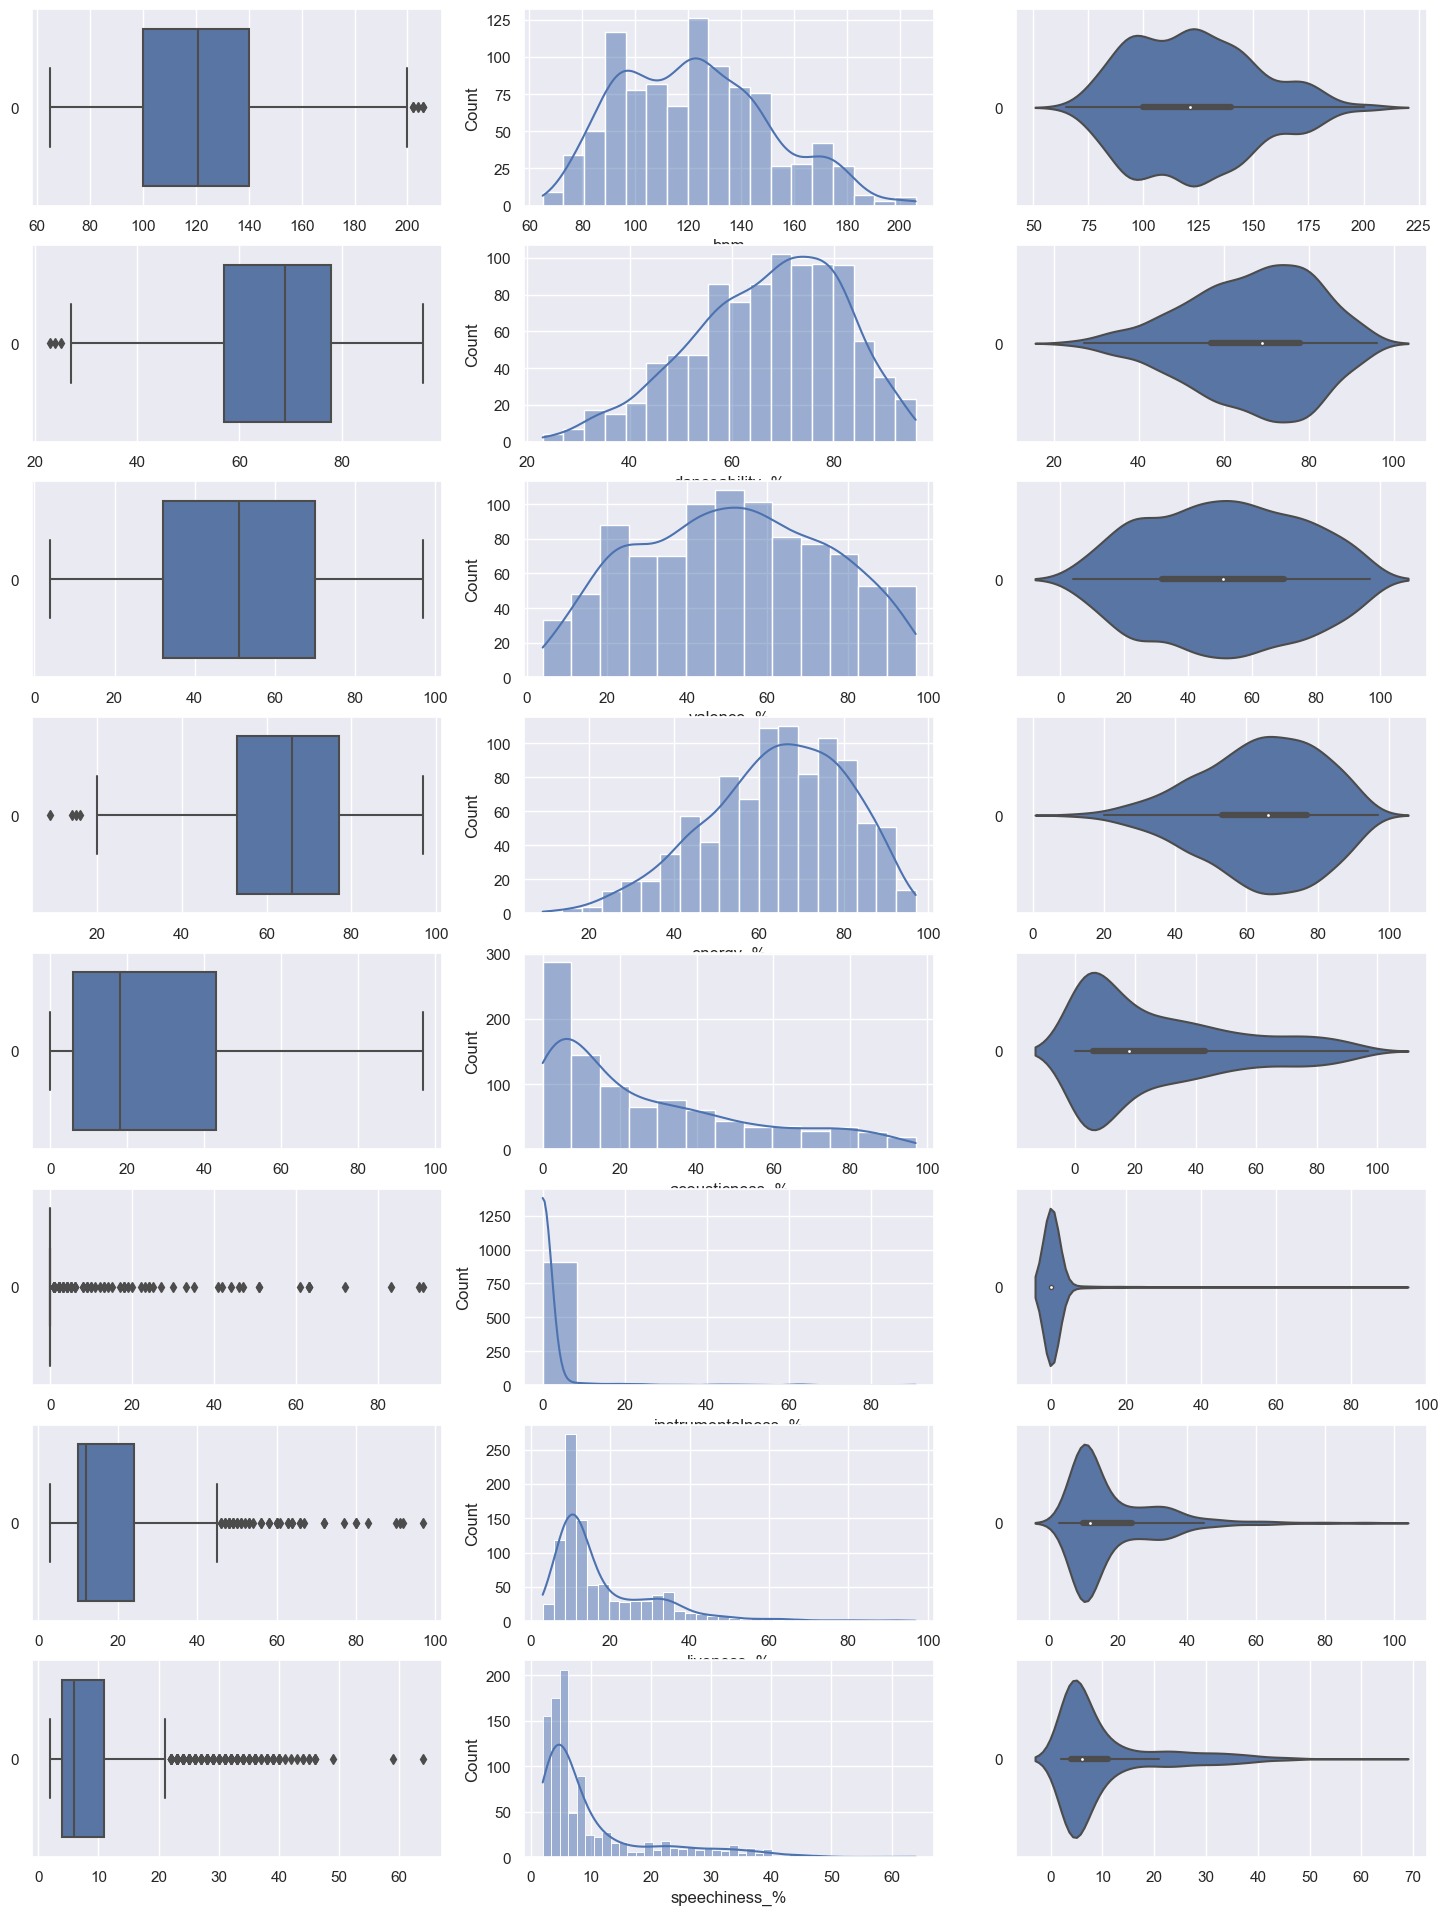

In [62]:
# PLOTS OF 8 Feautures(UNI-VARIATE)

f, axes = plt.subplots(8, 3, figsize=(18, 24)) #8 rows of 3 collums

count = 0

for var in numFeature:  
    
    sb.boxplot(data = numFeature[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numFeature[var], kde = True,ax = axes[count,1])
    sb.violinplot(data = numFeature[var], orient = "h", ax = axes[count,2])
    count += 1 

##### Exploring "key" (9th variable) (UNI -VARIATE)

In [105]:
keyDF = pd.DataFrame(spot_v1["key"])

In [115]:
# Number of different "key" type
print("Number of 'Key' type :", len(spot_v1["key"].unique()))

Number of 'Key' type : 12


In [117]:
# Total entries in 'key'
print("Number of 'key' entries:", len(keyDF.dropna()))

# NOTE there are 95 NaN values for "Key"

Number of 'key' entries: 858


In [109]:
# VALUE COUNT of each "Key"
print(spot_v1["key"].value_counts())

C#    120
G      96
G#     91
F      89
B      81
D      81
A      75
F#     73
E      62
A#     57
D#     33
Name: key, dtype: int64


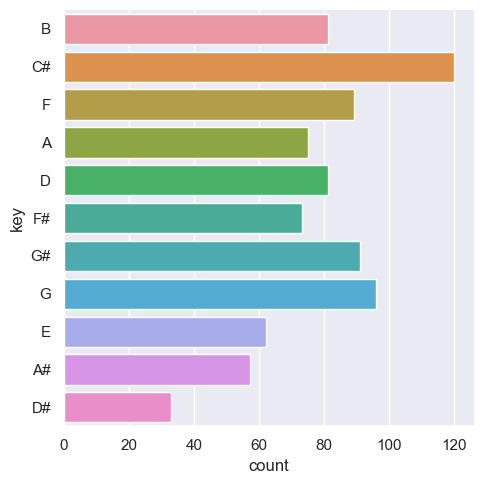

In [120]:
# CATPLOT for "key"
sb.catplot(y = "key", data = spot_v1, kind = "count")

##### Exploring "mode" (10th variable) (UNI-VARIATE)

In [113]:
modeDF = pd.DataFrame(spot_v1["mode"])

In [114]:
# Number of different "mode" type
print("Number of 'mode' types :", len(spot_v1["mode"].unique()))

Number of 'mode' types : 2


In [118]:
# Total entries in 'mode'
print("Number of mode entries :", len(modeDF.dropna()))

Number of mode entries : 953


In [119]:
# VALUE COUNT of each "mode"
print(spot_v1["mode"].value_counts())

Major    550
Minor    403
Name: mode, dtype: int64


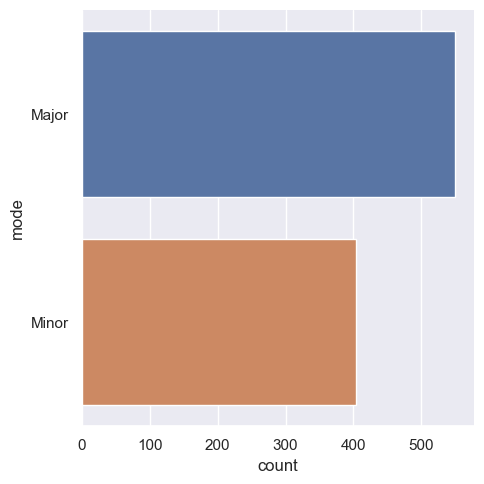

In [121]:
# CATPLOT for "mode"
sb.catplot(y = "mode", data = spot_v1, kind = "count")

---
#### BI-VARIATE Exploration

##### BI-VARIATE comparison ("the 8 feautres" against "Streams")

In [100]:
# DataFrame with the 8 Features + "streams"
featStreamDF = pd.DataFrame(spot_v1[["bpm", "danceability_%", "valence_%", "energy_%", "acousticness_%", "instrumentalness_%","liveness_%","speechiness_%","streams"]])

In [101]:
# Calculate the correlation matrix(8 features + "streams")
featStreamDF.corr()

,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,streams
bpm,1.000000,-0.147095,0.041195,0.025794,-0.017694,-0.001195,-0.000761,0.039260,-0.002011
danceability_%,-0.147095,1.000000,0.408451,0.198095,-0.236165,-0.089138,-0.077538,0.184977,-0.104451
valence_%,0.041195,0.408451,1.000000,0.357612,-0.081907,-0.132890,0.021278,0.041081,-0.041749
energy_%,0.025794,0.198095,0.357612,1.000000,-0.577344,-0.038547,0.117302,-0.004846,-0.026311
acousticness_%,-0.017694,-0.236165,-0.081907,-0.577344,1.000000,0.042796,-0.050142,-0.022501,-0.003746
instrumentalness_%,-0.001195,-0.089138,-0.132890,-0.038547,0.042796,1.000000,-0.045967,-0.083396,-0.044703
liveness_%,-0.000761,-0.077538,0.021278,0.117302,-0.050142,-0.045967,1.000000,-0.022525,-0.048232
speechiness_%,0.039260,0.184977,0.041081,-0.004846,-0.022501,-0.083396,-0.022525,1.000000,-0.111568
streams,-0.002011,-0.104451,-0.041749,-0.026311,-0.003746,-0.044703,-0.048232,-0.111568,1.000000


<Axes: >

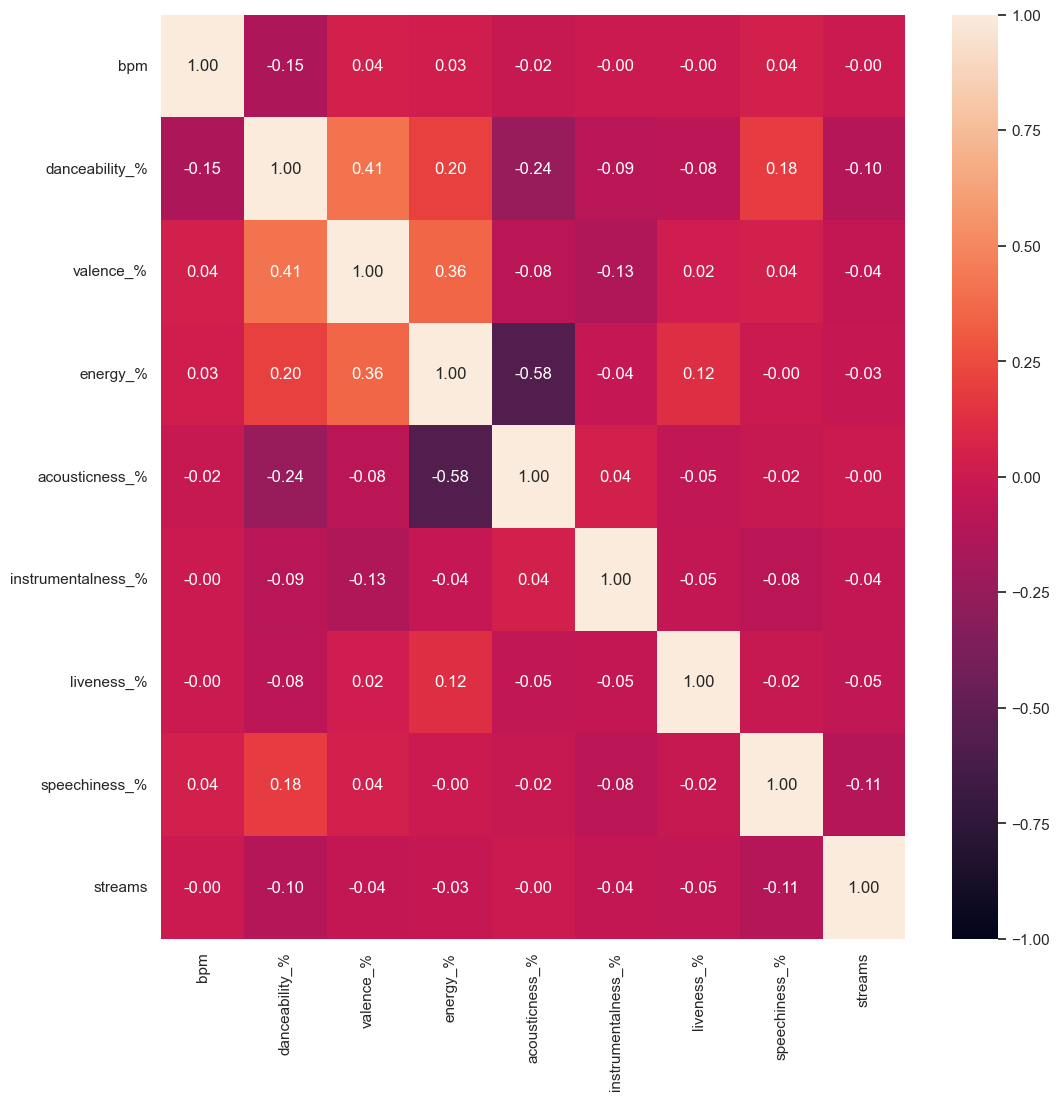

In [103]:
# HEATMAP for corr.
f = plt.figure(figsize=(12, 12))
sb.heatmap(featStreamDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

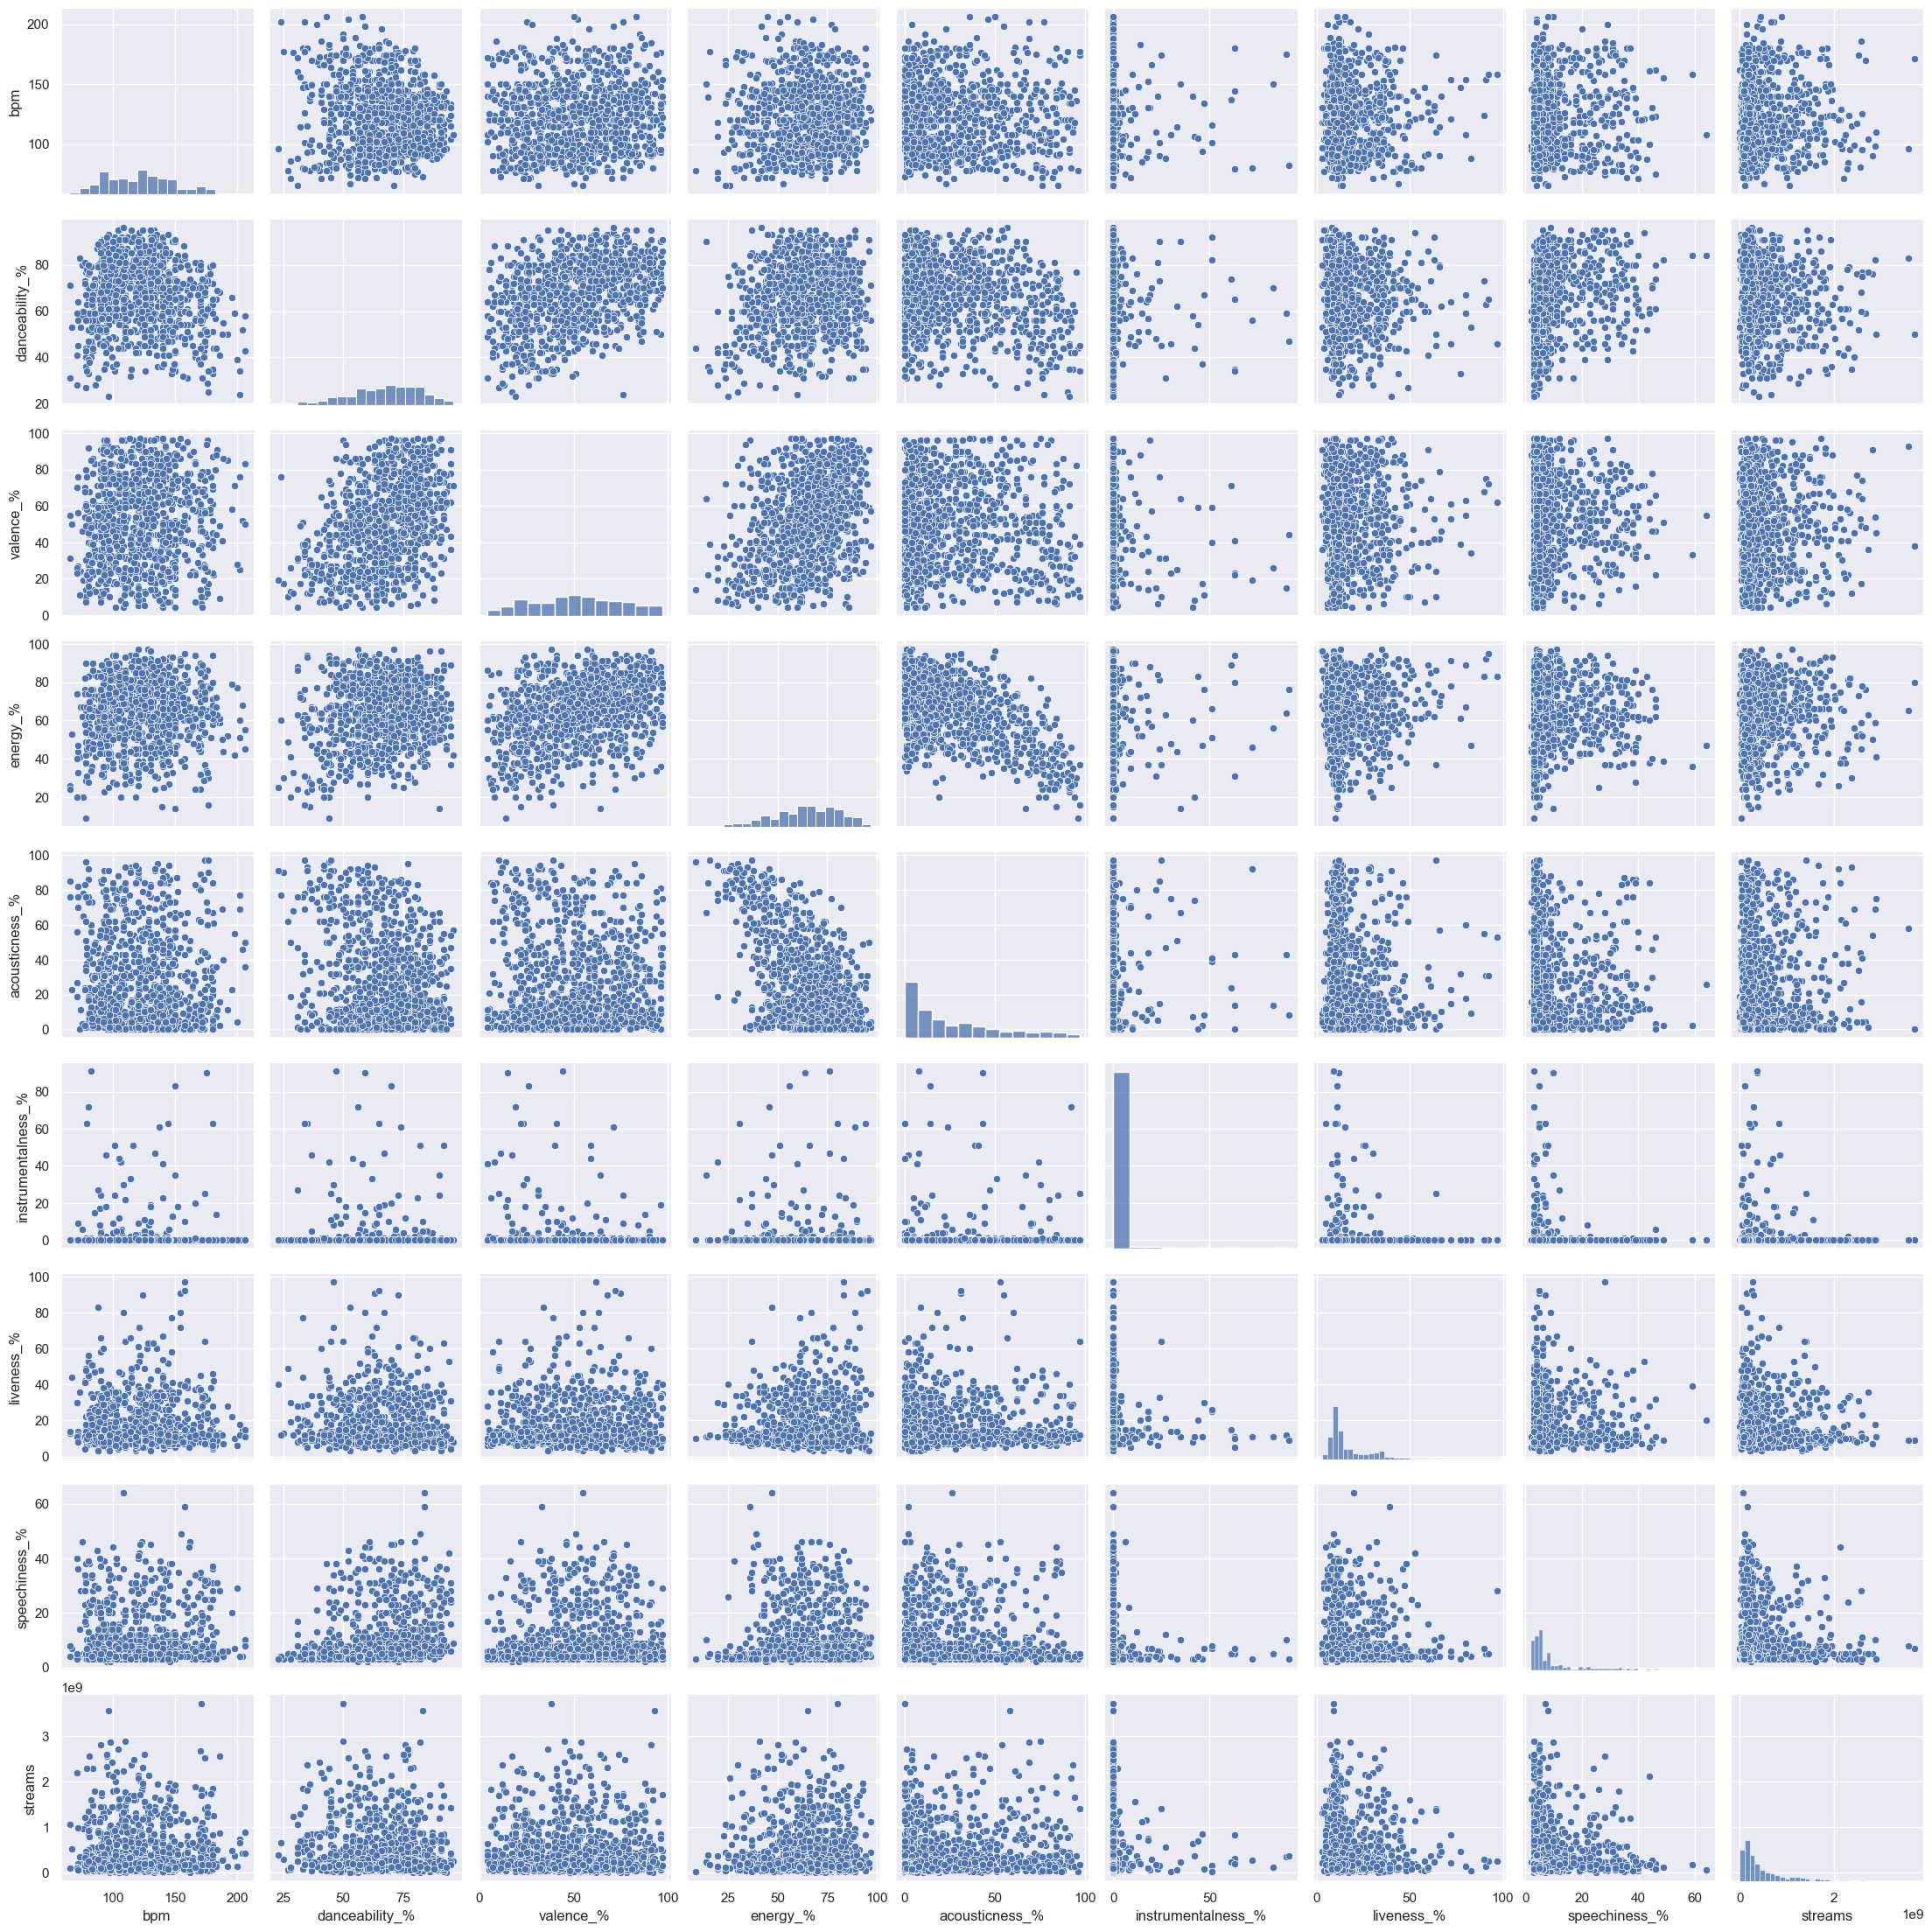

In [104]:
# PAIPLOT
sb.pairplot(data = featStreamDF) 

##### BI-VARIATE comparision 'Key' (9th feature)with 'streams' (Need some more content)

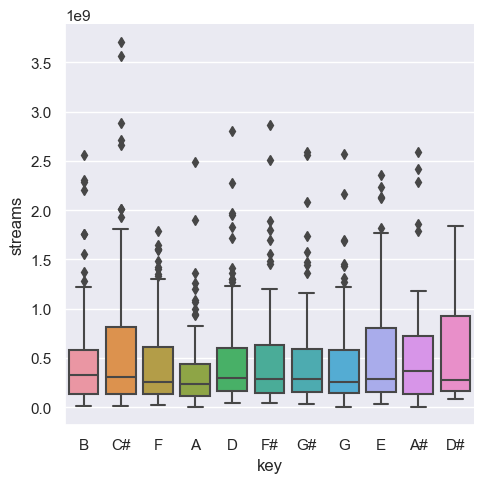

In [122]:
sb.catplot(data= spot_v1, x= "key", y="streams", kind="box")

In [ ]:
# Some changes occuring , key affects streams?

##### BI-VARIATE comparision 'mode' (10th feature)with 'streams' (Need some more content)

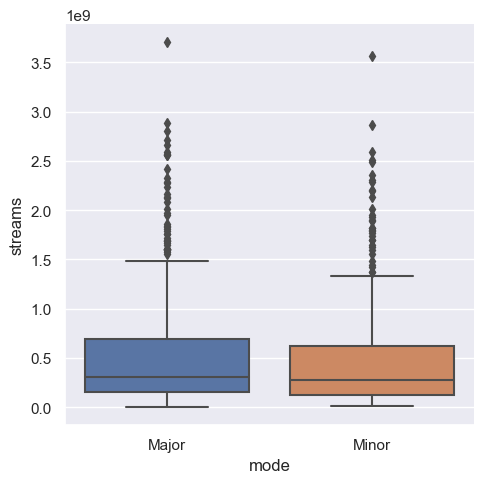

In [123]:
sb.catplot(data= spot_v1, x= "mode", y="streams", kind="box")

In [ ]:
# Some changes too, mode affects streams?